In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt



### Generae Data

In [21]:
# Generate some synthetic data
np.random.seed(0)
X = np.random.randint(0, 1000, 1000).reshape(-1, 1)
Y = np.where((X > 600) & (X < 800), 1, 0)  # Y=1 if 500 < X < 800, else Y=0


### Logistic Regression

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X, Y)
log_pred = log_reg.predict(X)

c:\Users\danny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM with linear kernal

In [23]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, Y)
svm_linear_pred = svm_linear.predict(X)

c:\Users\danny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM with RBF kernal

In [24]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X, Y)
svm_rbf_pred = svm_rbf.predict(X)

c:\Users\danny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluation

In [28]:
log_acc = accuracy_score(Y, log_pred)
svm_linear_acc = accuracy_score(Y, svm_linear_pred)
svm_rbf_acc = accuracy_score(Y, svm_rbf_pred)

print(f'Logistic Regression Accuracy: {log_acc}')
print(f'SVM Linear Accuracy: {svm_linear_acc}')
print(f'SVM RBF Accuracy: {svm_rbf_acc}')

Logistic Regression Accuracy: 0.801
SVM Linear Accuracy: 0.801
SVM RBF Accuracy: 0.99


### Deployment (Visualization of Results)

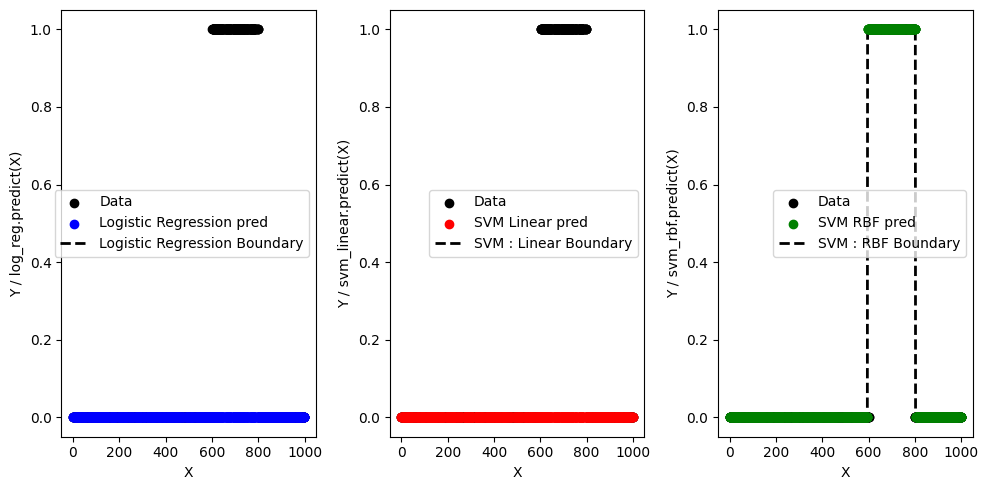

In [ ]:
# Generate a range of values for plotting decision boundaries
x_range = np.linspace(0, 1000, 1000).reshape(-1, 1)

log_boundary = log_reg.predict_log_proba(x_range)[:, 1] >= 0.5
svm_rbf_boundary = svm_rbf.decision_function(x_range) 
svm_linear_boundary = svm_linear.decision_function(x_range) 


# Plot the data and decision boundaries for logistic regression
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(X, Y, color='black', zorder=20, label='Data')
plt.scatter(X, log_pred, color='blue', zorder=20, label='Logistic Regression pred')
plt.plot(x_range, log_boundary, 'k--', linewidth=2, label='Logistic Regression Boundary')
plt.xlabel('X')
plt.ylabel('Y / log_reg.predict(X)')
plt.legend()

# Plot the data and decision boundaries for SVM
plt.subplot(1, 3, 2)
plt.scatter(X, Y, color='black', zorder=20, label='Data')
plt.scatter(X, svm_linear_pred, color='red', zorder=20, label='SVM Linear pred')
plt.plot(x_range, (svm_linear_boundary >= 0).astype(int), 'k--', linewidth=2, label='SVM : Linear Boundary')
plt.xlabel('X')
plt.ylabel('Y / svm_linear.predict(X)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, Y, color='black', zorder=20, label='Data')
plt.scatter(X, svm_rbf_pred, color='green', zorder=20, label='SVM RBF pred')
plt.plot(x_range, (svm_rbf_boundary >= 0).astype(int), 'k--', linewidth=2, label='SVM : RBF Boundary')
plt.xlabel('X')
plt.ylabel('Y / svm_rbf.predict(X)')
plt.legend()


plt.tight_layout()
plt.show()